## Imports

In [1]:
%env TF_FORCE_UNIFIED_MEMORY=1

env: TF_FORCE_UNIFIED_MEMORY=1


In [2]:
import unlimtd_i
import time
from jax import random
import test
import plots
import ntk
import nll
from jax import numpy as np
import pickle
import models
import utils
from matplotlib import pyplot as plt
import dataset_sines_infinite
import dataset_sines_finite

In [3]:
dataset_sines_finite.init_dataset(random.PRNGKey(0), 0.05, _n_train_tasks=10)

2022-08-26 19:07:59.980168: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/pkgs/cudatoolkit-11.3.1-h2bc3f7f_2/lib
2022-08-26 19:07:59.980200: W external/org_tensorflow/tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)


## Option #1: training the network in this notebook

In [4]:
seed = 1655235988902897757
print(seed)

1655235988902897757


In [5]:
init_params, pre_state, pre_evals, post_state, pre_losses, post_losses, post_evals = unlimtd_i.unlimtd_i_uni_modal_finite(seed=seed,
                                                                                     pre_n_epochs=60000,
                                                                                     pre_n_tasks=6,
                                                                                     pre_K=10,
                                                                                     post_n_epochs=0,
                                                                                     post_n_tasks=0,
                                                                                     post_K=0,
                                                                                     data_noise=0.05, 
                                                                                     maddox_noise=0.05,
                                                                                     meta_lr=0.001,
                                                                                     subspace_dimension=10)

This is UNLIMTD-I
For the uni-modal dataset: finite sine dataset (make sure that you have initialized dataset_sines_finite.py beforehand)
This variant of UNLIMTD-I approaches the distribution with a single GP
Creating model
Creating optimizers (pre-training)
Starting training
Starting training with:
-n_epochs=60000
-n_tasks=6
-K=10
-data_noise=0.05
-maddox_noise=0.05
0  | 1236.2206 (3.1000 s)
Eval: (DeviceArray(1721.0223, dtype=float32), DeviceArray(4.955229, dtype=float32))
10  | 979.8513 (0.0031 s)
20  | 183.6270 (0.0031 s)
30  | 1554.7561 (0.0031 s)
40  | 993.6662 (0.0031 s)
50  | 755.7170 (0.0031 s)
60  | 328.1130 (0.0033 s)
70  | 172.8349 (0.0031 s)
80  | 187.6762 (0.0031 s)
90  | 37.4248 (0.0031 s)
100  | 51.5513 (0.0031 s)
110  | 97.0201 (0.0031 s)
120  | 35.5976 (0.0031 s)
130  | 118.4670 (0.0031 s)
140  | 82.2834 (0.0031 s)
150  | 90.7843 (0.0031 s)
160  | 103.7850 (0.0034 s)
170  | 38.3985 (0.0032 s)
180  | 41.9580 (0.0031 s)
190  | 24.6333 (0.0031 s)
200  | 22.0210 (0.0031 s

In [6]:
output = {}
output["seed"] = seed
output["pre_n_epochs"]=60000
output["pre_n_tasks"]=6
output["pre_K"]=10
output["post_n_epochs"]=0
output["post_n_tasks"]=0
output["post_K"]=0
output["data_noise"]=0.05
output["maddox_noise"]=0.05
output["meta_lr"]=0.001
output["subspace_dimension"]=10
output["pre_losses"]=pre_losses
output["post_losses"]=post_losses
output["init_params"]=init_params
output["intermediate_params"]=pre_state.params
#output["trained_params"]=post_state.params
output["intermediate_mean"]=pre_state.mean
#output["trained_mean"]=post_state.mean
output["intermediate_batch_stats"]=pre_state.batch_stats
#output["trained_batch_stats"]=post_state.batch_stats
#output["trained_scale"]=post_state.scale
#output["proj"]=post_state.proj
output["pre_evals"]=pre_evals
#output["post_evals"]=post_evals

In [8]:
with open("logs_final/identity_finite.pickle", "wb") as handle:
    pickle.dump(output, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Option #2: loading a previously trained network

In [9]:
with open("logs_final/identity_finite.pickle", "rb") as handle:
    output = pickle.load(handle)

## Testing the trained network

In [7]:
model = models.small_network(40, "relu", 1)
apply_fn = utils.apply_fn_wrapper(model.apply, False)

In [8]:
kernel, kernel_self, jac = ntk.get_kernel_and_jac_identity_cov(apply_fn, output["intermediate_params"], output["intermediate_batch_stats"])

In [9]:
key = random.PRNGKey(0)

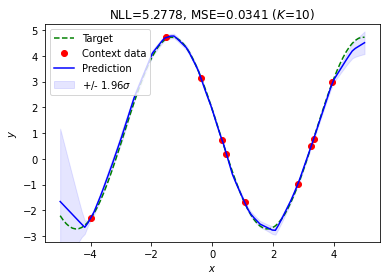

In [13]:
key, subkey = random.split(key)
plots.plot_notebooks(subkey, kernel, kernel_self, jac, output["intermediate_mean"], 10, dataset_sines_infinite)